In [1]:
import pandas as pd
import numpy as np
import unidecode
import matplotlib as mpl
from adjustText import adjust_text
import matplotlib.pyplot as plt

In [2]:
background = '#D7E5E5'
mpl.rcParams['font.family']= 'Candara'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 15
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['savefig.facecolor']='white'
mpl.rcParams['axes.titleweight'] = 'heavy'
mpl.rcParams['axes.labelweight'] = 'heavy'

In [3]:
url_passing = 'https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats'
url_possession = 'https://fbref.com/en/comps/Big5/possession/players/Big-5-European-Leagues-Stats'
url_defence = 'https://fbref.com/en/comps/Big5/defense/players/Big-5-European-Leagues-Stats'

In [4]:
data_passing = pd.read_html(url_passing, header=1)[0]
data_passing = data_passing[data_passing['Player'] != 'Player']
data_passing

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Cmp,...,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-043,2000,22.6,754,...,43.8,1,0.9,+0.1,12,37,28,7,72,Matches
1,2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-141,1987,22.1,856,...,64.7,0,0.2,-0.2,6,50,4,0,53,Matches
2,3,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-327,2000,20.2,1186,...,85.1,0,0.8,-0.8,9,52,5,0,49,Matches
3,4,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-015,1993,20.3,836,...,68.0,1,1.7,-0.7,14,78,13,6,79,Matches
4,5,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-310,2000,0.5,2,...,NaN,0,0.0,0.0,0,0,0,0,0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,2750,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-014,1999,16.3,664,...,71.4,1,0.4,+0.6,8,62,7,1,58,Matches
2860,2751,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-144,1997,15.2,464,...,67.9,1,1.0,0.0,14,37,14,2,46,Matches
2861,2752,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-061,1998,15.3,653,...,65.8,4,3.6,+0.4,38,40,30,1,72,Matches
2862,2753,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-270,1990,11.9,188,...,75.0,1,1.0,0.0,9,12,0,0,13,Matches


In [5]:
data_possession = pd.read_html(url_possession, header=1)[0]
data_possession = data_possession[data_possession['Player'] != 'Player']
data_possession

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Touches,...,Prog,1/3,CPA,Mis,Dis,Targ,Rec,Rec%,Prog.1,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-043,2000,22.6,1291,...,120,38,10,17,21,800,722,90.3,29,Matches
1,2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-141,1987,22.1,1280,...,58,15,0,11,8,823,804,97.7,9,Matches
2,3,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-327,2000,20.2,1479,...,53,12,3,8,32,1244,1156,92.9,36,Matches
3,4,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-015,1993,20.3,1250,...,66,23,2,13,31,935,882,94.3,37,Matches
4,5,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-310,2000,0.5,12,...,0,1,0,4,0,12,8,66.7,2,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,2750,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-014,1999,16.3,927,...,61,19,0,12,6,651,629,96.6,16,Matches
2860,2751,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-144,1997,15.2,803,...,109,43,4,25,36,614,533,86.8,59,Matches
2861,2752,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-061,1998,15.3,919,...,92,31,4,22,27,777,676,87.0,63,Matches
2862,2753,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-270,1990,11.9,424,...,9,3,3,24,10,574,345,60.1,55,Matches


In [6]:
data_defence = pd.read_html(url_defence, header=1)[0]
data_defence = data_defence[data_defence['Player'] != 'Player']
data_defence

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tkl,...,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-043,2000,22.6,51,...,24,63,16,0,47,37,88,45,0,Matches
1,2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-141,1987,22.1,38,...,17,44,18,1,26,76,114,74,0,Matches
2,3,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-327,2000,20.2,42,...,56,22,1,0,21,38,80,14,0,Matches
3,4,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-015,1993,20.3,69,...,56,30,1,0,29,50,119,9,0,Matches
4,5,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-310,2000,0.5,0,...,3,1,0,0,1,0,0,0,0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,2750,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-014,1999,16.3,36,...,34,20,8,0,12,24,60,31,0,Matches
2860,2751,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-144,1997,15.2,33,...,66,29,5,0,24,33,66,19,2,Matches
2861,2752,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-061,1998,15.3,22,...,105,7,1,0,6,9,31,8,1,Matches
2862,2753,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-270,1990,11.9,4,...,51,3,2,0,1,2,6,16,0,Matches


In [7]:
d1 = data_passing[['Player', 'Pos', '90s', 'Prog', 'KP', 'PPA', 'CrsPA']]
d2 = data_possession[['Player', 'Touches', 'Prog', 'Succ']]
d3 = data_defence[['Player', 'TklW', 'Succ', 'Blocks', 'Int', 'Clr']]
d = pd.DataFrame(columns=['Player', '90s', 'Touches', 'Prog Passes', 'Key Passes', 'PPA', 'CrsPA', 'DribblesS', 'Prog Carries', 'TklW', 'PressureS', 'Blocks', 'Int', 'Clr'])
d['Player'] = d1['Player']
d['90s'] = d1['90s']
d['Touches'] = d2['Touches']
d['Prog Passes'] = d1['Prog']
d['Key Passes'] = d1['KP']
d['PPA'] = d1['PPA']
d['CrsPA'] = d1['CrsPA']
d['DribblesS'] = d2['Succ']
d['Prog Carries'] = d2['Prog']
d['TklW'] = d3['TklW']
d['PressureS'] = d3['Succ']
d['Blocks'] = d3['Blocks']
d['Int'] = d3['Int']
d['Clr'] = d3['Clr']
d.iloc[:, 1:] = d.iloc[:, 1:].astype(float)
d

,Player,90s,Touches,Prog Passes,Key Passes,PPA,CrsPA,DribblesS,Prog Carries,TklW,PressureS,Blocks,Int,Clr
0,Max Aarons,22.6,1291.0,72.0,12.0,28.0,7.0,26.0,120.0,30.0,74.0,63.0,37.0,45.0
1,Yunis Abdelhamid,22.1,1280.0,53.0,6.0,4.0,0.0,11.0,58.0,29.0,111.0,44.0,76.0,74.0
2,Salis Abdul Samed,20.2,1479.0,49.0,9.0,5.0,0.0,20.0,53.0,26.0,132.0,22.0,38.0,14.0
3,Laurent Abergel,20.3,1250.0,79.0,14.0,13.0,6.0,29.0,66.0,40.0,161.0,30.0,50.0,9.0
4,Charles Abi,0.5,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Martín Zubimendi,16.3,927.0,58.0,8.0,7.0,1.0,5.0,61.0,16.0,70.0,20.0,24.0,31.0
2860,Szymon Żurkowski,15.2,803.0,46.0,14.0,14.0,2.0,20.0,109.0,24.0,65.0,29.0,33.0,19.0
2861,Martin Ødegaard,15.3,919.0,72.0,38.0,30.0,1.0,8.0,92.0,12.0,80.0,7.0,9.0,8.0
2862,Milan Đurić,11.9,424.0,13.0,9.0,0.0,0.0,5.0,9.0,3.0,23.0,3.0,2.0,16.0


In [8]:
player_position = pd.read_excel('Player Positions-FBRef format.xlsx')
player_position.drop_duplicates(inplace=True)
set(player_position['Position'])

{'Attacking Midfield',
 'Central Midfield',
 'Centre-Back',
 'Centre-Forward',
 'Defender',
 'Defensive Midfield',
 'Goalkeeper',
 'Left Midfield',
 'Left Winger',
 'Left-Back',
 'Right Midfield',
 'Right Winger',
 'Right-Back',
 'Second Striker',
 'attack',
 'midfield'}

In [9]:
data = pd.merge(player_position, d, on="Player")
data.drop_duplicates(inplace=True)
data['Progressive Actions'] = data['Prog Passes'] + data['DribblesS'] + data['Prog Carries'] + data['Key Passes'] + data['PPA'] + data['CrsPA']
data['Defensive Actions'] = data['TklW'] + data['PressureS'] + data['Blocks'] + data['Int'] + data['Clr']
data = data[data['90s']>=5.0]
data['PAp90'] = data['Progressive Actions']/data['90s']
data['DAp90'] = data['Defensive Actions']/data['90s']
who = ['Defensive Midfield', 'Central Midfield']
data = data[data['Position'].apply(lambda x: x in who)]
data

,S. No.,Player,Position,90s,Touches,Prog Passes,Key Passes,PPA,CrsPA,DribblesS,Prog Carries,TklW,PressureS,Blocks,Int,Clr,Progressive Actions,Defensive Actions,PAp90,DAp90
1,7,Laurent Abergel,Defensive Midfield,20.3,1250.0,79.0,14.0,13.0,6.0,29.0,66.0,40.0,161.0,30.0,50.0,9.0,207.0,290.0,10.197044,14.285714
9,19,Tyler Adams,Defensive Midfield,11.3,824.0,43.0,6.0,8.0,0.0,5.0,65.0,9.0,75.0,21.0,20.0,14.0,127.0,139.0,11.238938,12.300885
13,27,Lucien Agoume,Defensive Midfield,13.5,776.0,48.0,8.0,9.0,0.0,15.0,40.0,26.0,71.0,21.0,35.0,22.0,120.0,175.0,8.888889,12.962963
19,37,Jean-Eudes Aholou,Defensive Midfield,6.5,327.0,14.0,4.0,4.0,1.0,5.0,24.0,6.0,23.0,5.0,13.0,10.0,52.0,57.0,8.0,8.769231
35,56,Luis Alberto,Central Midfield,17.0,1426.0,114.0,39.0,34.0,4.0,18.0,130.0,15.0,68.0,15.0,17.0,5.0,339.0,120.0,19.941176,7.058824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,2795,Andre-Frank Zambo Anguissa,Defensive Midfield,13.3,966.0,67.0,15.0,13.0,1.0,21.0,74.0,20.0,84.0,17.0,25.0,20.0,191.0,166.0,14.360902,12.481203
1951,2801,Oier Zarraga,Central Midfield,9.5,472.0,51.0,6.0,9.0,0.0,6.0,41.0,5.0,32.0,14.0,13.0,5.0,113.0,69.0,11.894737,7.263158
1958,2810,Piotr Zieliński,Central Midfield,16.8,1008.0,75.0,44.0,36.0,6.0,19.0,85.0,11.0,56.0,23.0,11.0,2.0,265.0,103.0,15.77381,6.130952
1963,2818,Igor Zubeldia,Defensive Midfield,8.7,579.0,14.0,0.0,1.0,0.0,2.0,17.0,8.0,22.0,13.0,11.0,28.0,34.0,82.0,3.908046,9.425287


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

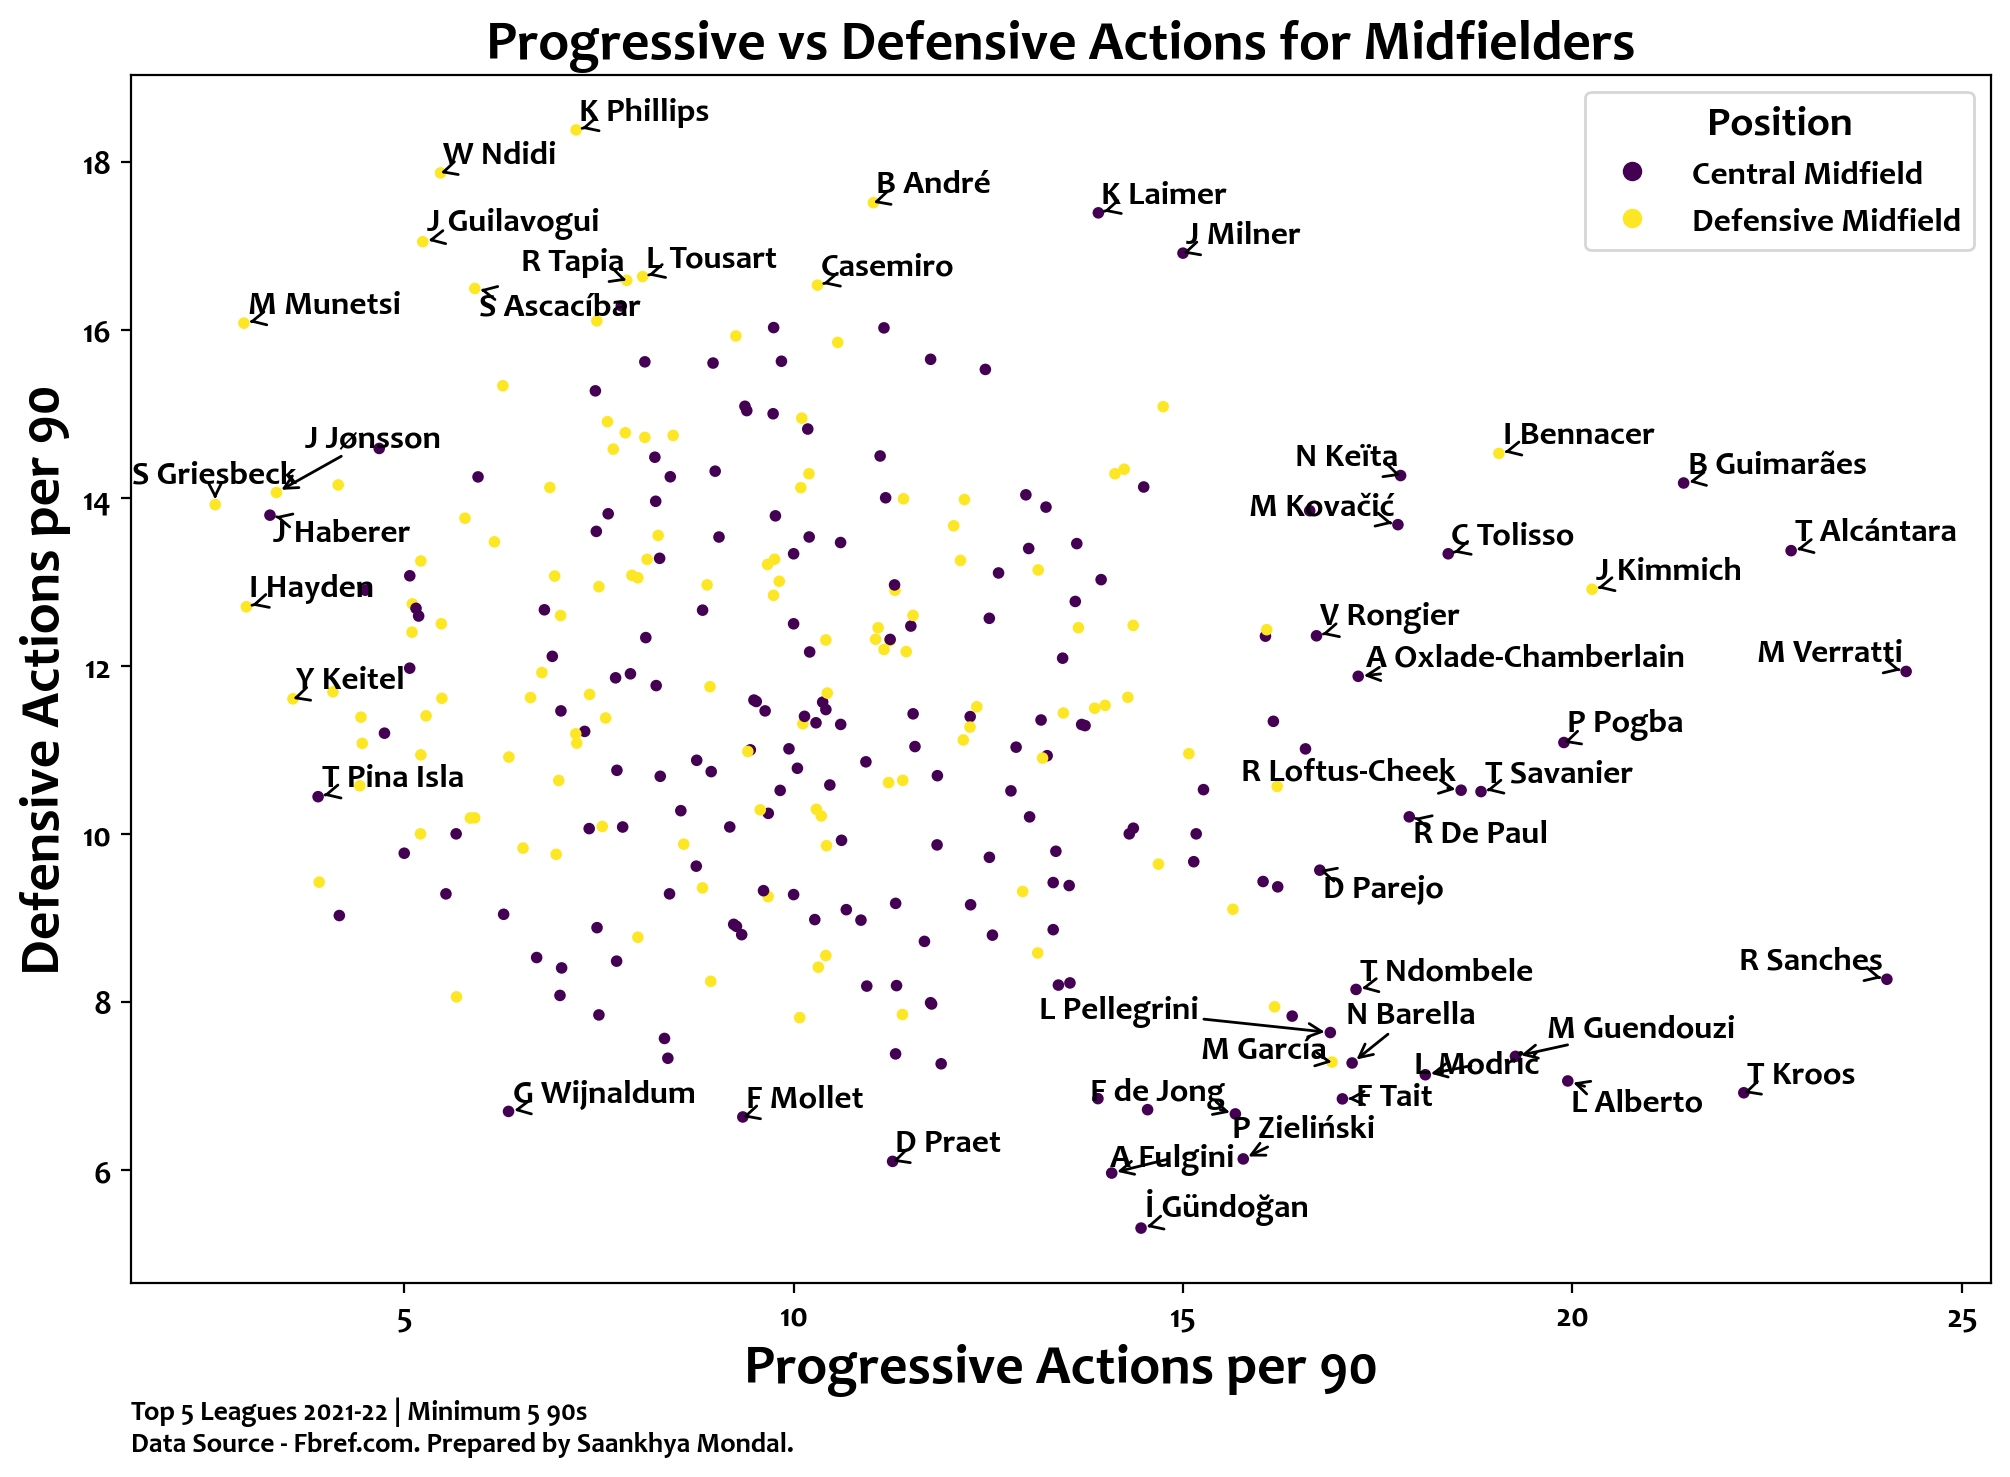

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
par_x = list(data['PAp90'])
par_y = list(data['DAp90'])
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, c=col_codes, s=10)

outlier_top = data['DAp90'].astype(float).quantile(0.97)
outlier_bottom = data['DAp90'].astype(float).quantile(0.02)
outlier_right = data['PAp90'].astype(float).quantile(0.92)
outlier_left = data['PAp90'].astype(float).quantile(0.02)

txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top or par_x[i]<outlier_left or par_y[i]<outlier_bottom:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='black'))
ax.set_xlabel('Progressive Actions per 90', fontsize=20)
ax.set_ylabel('Defensive Actions per 90', fontsize=20)
ax.set_title('Progressive vs Defensive Actions for Midfielders', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=['Central Midfield', 'Defensive Midfield'], title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [11]:
fig.savefig('Images/PAp90vDAp90_CM_DM.png', dpi=400, bbox_inches='tight')

In [12]:
data = pd.merge(player_position, d, on="Player")
data.drop_duplicates(inplace=True)
data['Progressive Actions'] = data['Prog Passes'] + data['DribblesS'] + data['Prog Carries'] + data['Key Passes'] + data['PPA'] + data['CrsPA']
data['Defensive Actions'] = data['TklW'] + data['PressureS'] + data['Blocks'] + data['Int'] + data['Clr']
data = data[data['90s']>=5.0]
data['PAp90'] = data['Progressive Actions']/data['90s']
data['DAp90'] = data['Defensive Actions']/data['90s']
who = ['Left-Back', 'Right-Back']
data = data[data['Position'].apply(lambda x: x in who)]
data

,S. No.,Player,Position,90s,Touches,Prog Passes,Key Passes,PPA,CrsPA,DribblesS,Prog Carries,TklW,PressureS,Blocks,Int,Clr,Progressive Actions,Defensive Actions,PAp90,DAp90
7,17,Marcos Acuña,Left-Back,16.6,1475.0,85.0,30.0,31.0,17.0,33.0,102.0,23.0,55.0,20.0,22.0,23.0,298.0,143.0,17.951807,8.614458
12,26,Martin Agirregabiria,Right-Back,16.2,891.0,51.0,13.0,18.0,10.0,14.0,43.0,19.0,52.0,27.0,23.0,41.0,149.0,162.0,9.197531,10.0
17,32,Ruben Aguilar,Right-Back,15.1,1362.0,89.0,8.0,20.0,6.0,6.0,103.0,36.0,90.0,22.0,38.0,49.0,232.0,235.0,15.364238,15.562914
21,39,Ola Aina,Right-Back,11.8,719.0,49.0,13.0,18.0,5.0,14.0,61.0,12.0,46.0,20.0,27.0,24.0,160.0,129.0,13.559322,10.932203
22,41,Rayan Aït Nouri,Left-Back,11.3,746.0,23.0,10.0,7.0,4.0,22.0,72.0,29.0,86.0,22.0,23.0,18.0,138.0,178.0,12.212389,15.752212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,2749,Brandon Williams,Left-Back,16.6,1005.0,61.0,12.0,16.0,3.0,12.0,63.0,19.0,61.0,42.0,46.0,32.0,167.0,200.0,10.060241,12.048193
1945,2793,Joseba Zaldúa,Right-Back,8.7,540.0,24.0,4.0,10.0,3.0,4.0,22.0,14.0,23.0,17.0,10.0,26.0,67.0,90.0,7.701149,10.344828
1949,2799,Gabriele Zappa,Right-Back,11.0,651.0,29.0,7.0,6.0,5.0,6.0,34.0,8.0,50.0,22.0,23.0,14.0,87.0,117.0,7.909091,10.636364
1953,2803,Deyovaisio Zeefuik,Right-Back,6.3,339.0,20.0,4.0,5.0,1.0,2.0,23.0,7.0,28.0,17.0,12.0,17.0,55.0,81.0,8.730159,12.857143


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

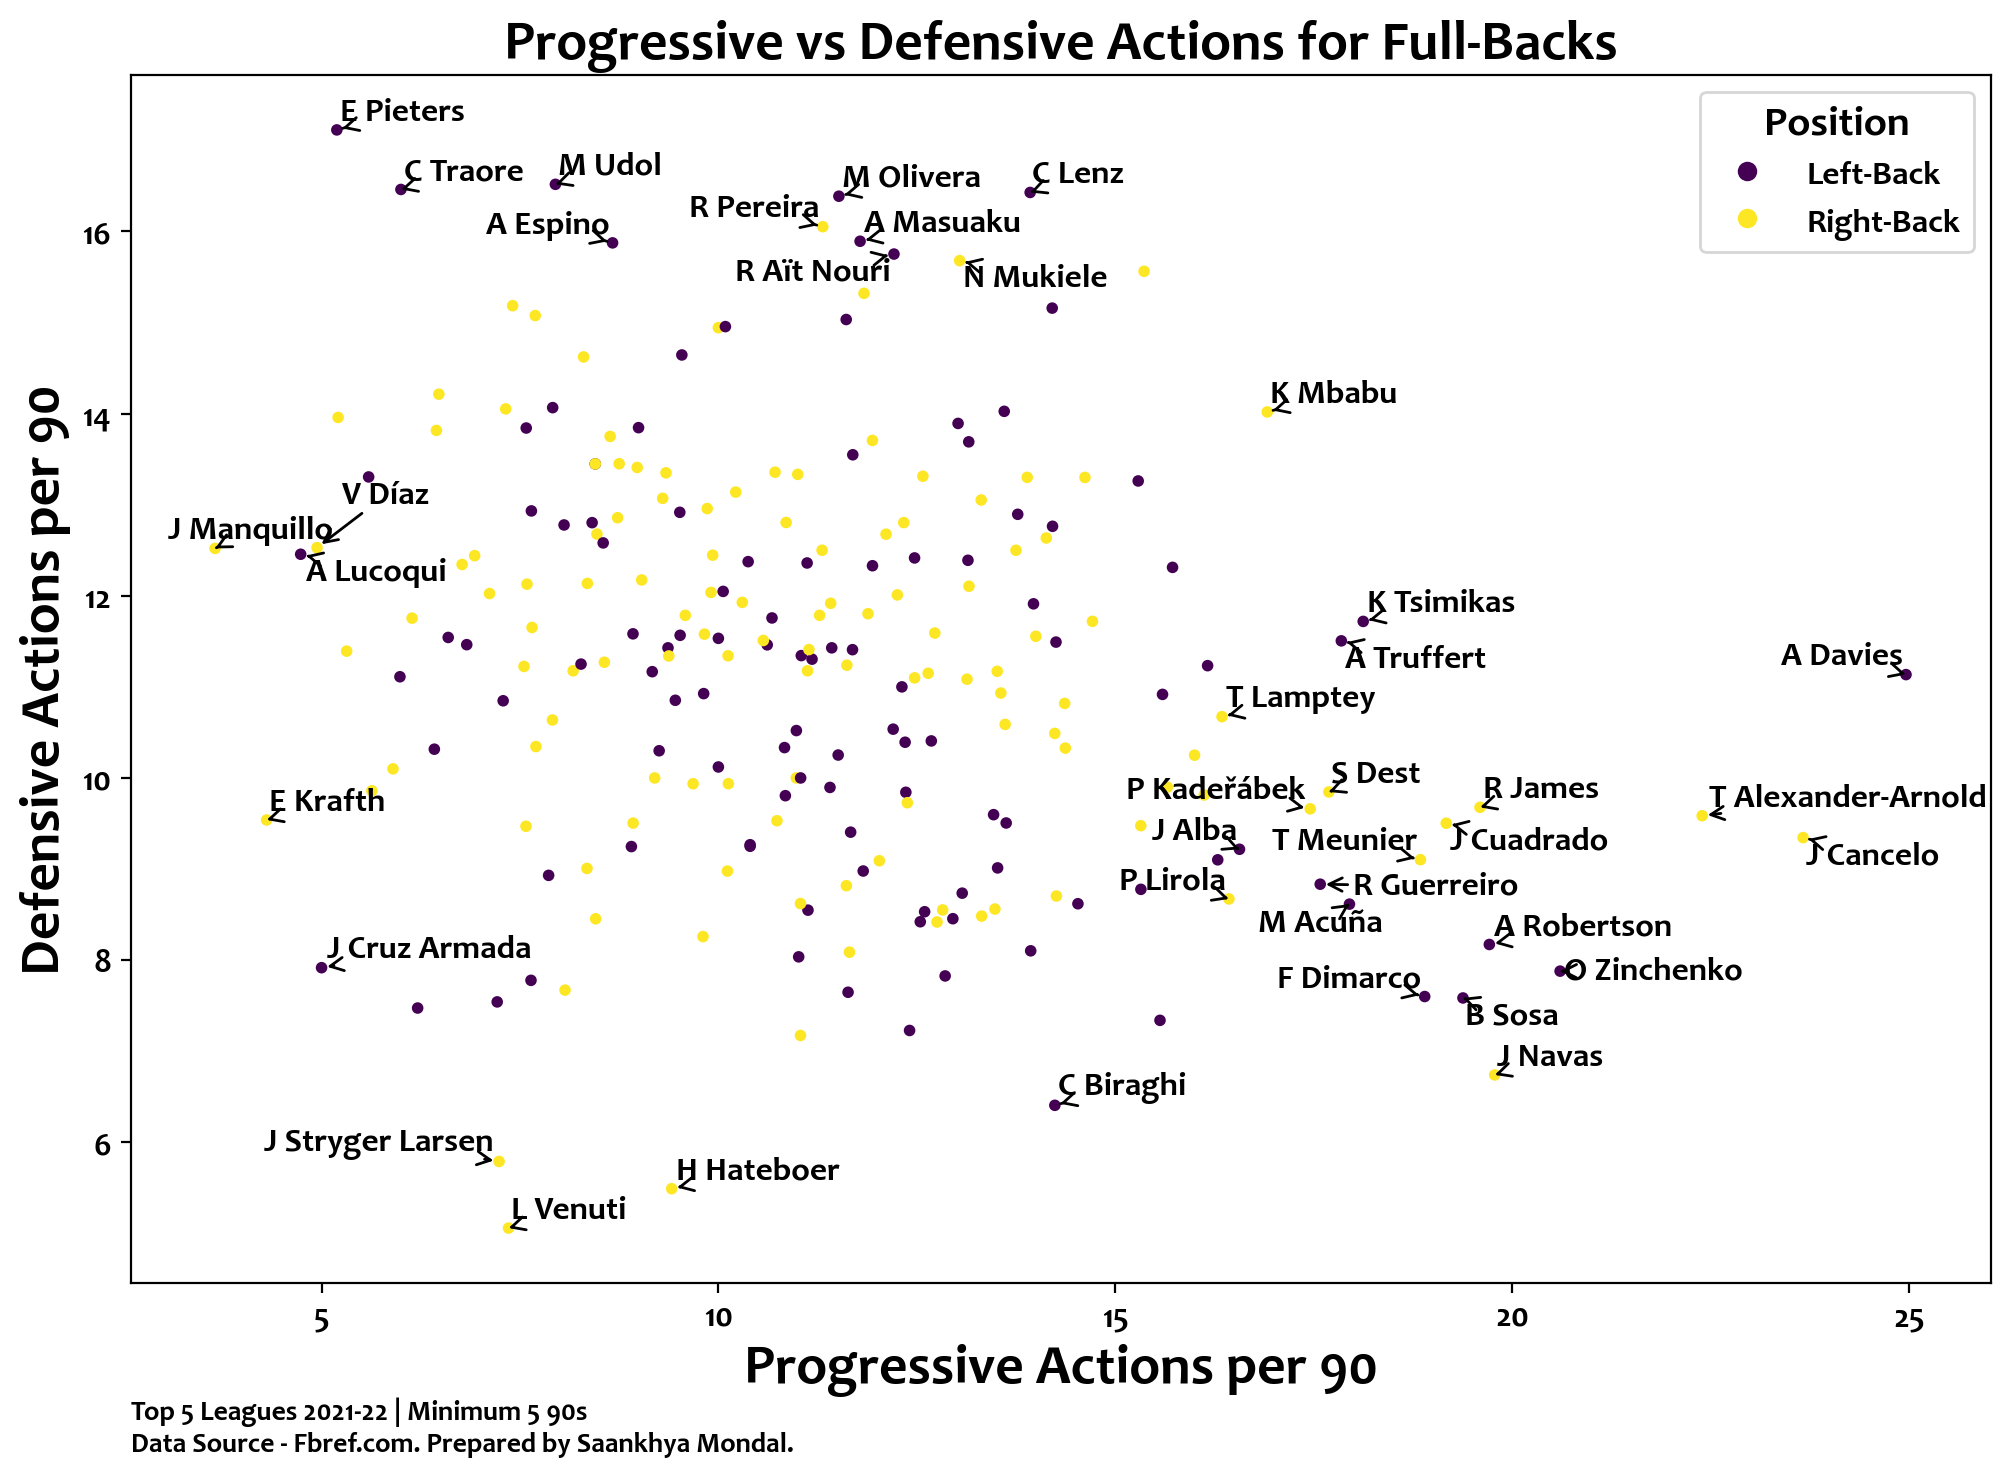

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
par_x = list(data['PAp90'])
par_y = list(data['DAp90'])
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, c=col_codes, s=10)

outlier_top = data['DAp90'].astype(float).quantile(0.96)
outlier_bottom = data['DAp90'].astype(float).quantile(0.02)
outlier_right = data['PAp90'].astype(float).quantile(0.91)
outlier_left = data['PAp90'].astype(float).quantile(0.02)

txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top or par_x[i]<outlier_left or par_y[i]<outlier_bottom:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='black'))
ax.set_xlabel('Progressive Actions per 90', fontsize=20)
ax.set_ylabel('Defensive Actions per 90', fontsize=20)
ax.set_title('Progressive vs Defensive Actions for Full-Backs', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [14]:
fig.savefig('Images/PAp90vDAp90_FB.png', dpi=400, bbox_inches='tight')

In [15]:
data = pd.merge(player_position, d, on="Player")
data.drop_duplicates(inplace=True)
data['Progressive Actions'] = data['Prog Passes'] + data['DribblesS'] + data['Prog Carries'] + data['Key Passes'] + data['PPA'] + data['CrsPA']
data['Defensive Actions'] = data['TklW'] + data['PressureS'] + data['Blocks'] + data['Int'] + data['Clr']
data = data[data['90s']>=5.0]
data['PAp90'] = data['Progressive Actions']/data['90s']
data['DAp90'] = data['Defensive Actions']/data['90s']
who = ['Centre-Back']
data = data[data['Position'].apply(lambda x: x in who)]
data

,S. No.,Player,Position,90s,Touches,Prog Passes,Key Passes,PPA,CrsPA,DribblesS,Prog Carries,TklW,PressureS,Blocks,Int,Clr,Progressive Actions,Defensive Actions,PAp90,DAp90
0,4,Yunis Abdelhamid,Centre-Back,22.1,1280.0,53.0,6.0,4.0,0.0,11.0,58.0,29.0,111.0,44.0,76.0,74.0,132.0,334.0,5.972851,15.113122
5,15,Francesco Acerbi,Centre-Back,17.1,1412.0,66.0,4.0,4.0,0.0,1.0,63.0,8.0,27.0,30.0,33.0,76.0,138.0,174.0,8.070175,10.175439
15,30,Nayef Aguerd,Centre-Back,19.9,1618.0,55.0,1.0,2.0,0.0,3.0,48.0,8.0,40.0,22.0,33.0,100.0,109.0,203.0,5.477387,10.201005
20,38,Joseph Aidoo,Centre-Back,15.3,890.0,42.0,1.0,1.0,0.0,2.0,46.0,19.0,66.0,33.0,29.0,66.0,92.0,213.0,6.013072,13.921569
24,44,Manuel Akanji,Centre-Back,17.4,1483.0,88.0,2.0,3.0,0.0,5.0,83.0,27.0,84.0,23.0,35.0,50.0,181.0,219.0,10.402299,12.586207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,2715,Stefan de Vrij,Centre-Back,17.7,1107.0,27.0,0.0,2.0,0.0,2.0,41.0,23.0,59.0,11.0,23.0,57.0,72.0,173.0,4.067797,9.774011
1905,2736,Adam Webster,Centre-Back,13.0,1042.0,59.0,1.0,1.0,0.0,7.0,68.0,9.0,32.0,22.0,25.0,57.0,136.0,145.0,10.461538,11.153846
1911,2745,Ben White,Centre-Back,20.0,1223.0,48.0,7.0,3.0,0.0,6.0,49.0,16.0,50.0,34.0,44.0,62.0,113.0,206.0,5.65,10.3
1936,2781,Maya Yoshida,Centre-Back,16.6,894.0,34.0,3.0,3.0,1.0,3.0,21.0,11.0,37.0,27.0,40.0,65.0,65.0,180.0,3.915663,10.843373


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

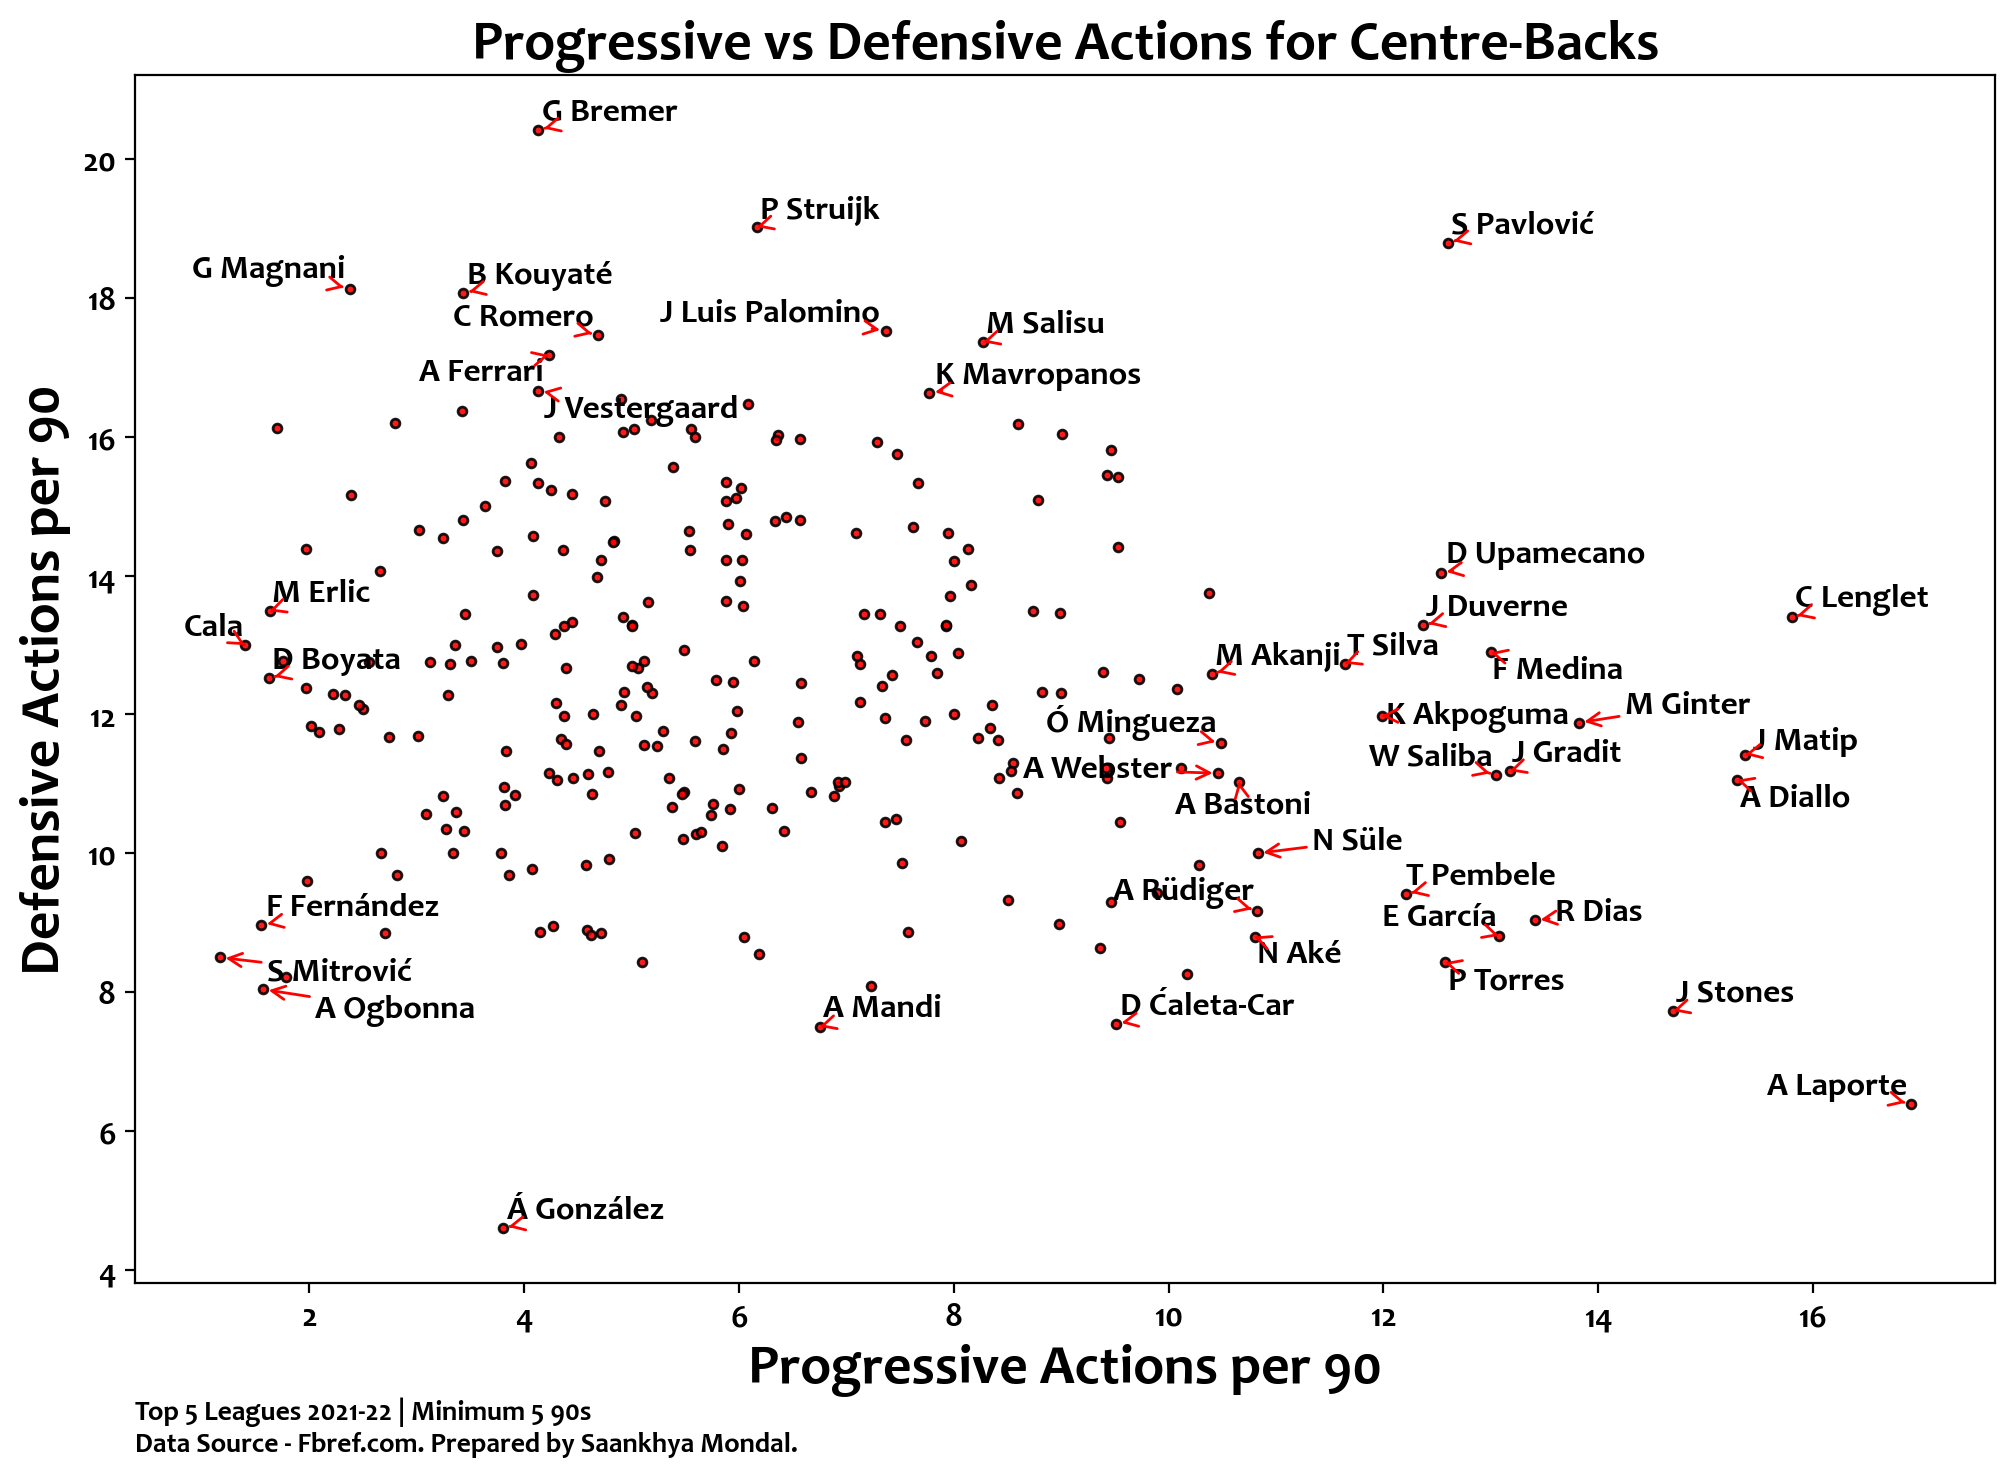

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
par_x = list(data['PAp90'])
par_y = list(data['DAp90'])
scatter = plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')

outlier_top = data['DAp90'].astype(float).quantile(0.96)
outlier_bottom = data['DAp90'].astype(float).quantile(0.02)
outlier_right = data['PAp90'].astype(float).quantile(0.91)
outlier_left = data['PAp90'].astype(float).quantile(0.02)

txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top or par_x[i]<outlier_left or par_y[i]<outlier_bottom:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))
ax.set_xlabel('Progressive Actions per 90', fontsize=20)
ax.set_ylabel('Defensive Actions per 90', fontsize=20)
ax.set_title('Progressive vs Defensive Actions for Centre-Backs', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [17]:
fig.savefig('Images/PAp90vDAp90_CB.png', dpi=400, bbox_inches='tight')